# Hierarchical Clustering 
### Author: Ryan Liao
### Date: 2022/01/28

In [3]:
#H-Clustering
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np  

In [11]:
customer_data = pd.read_csv('data/shopping_data.csv')
data = customer_data.iloc[:, 3:5].values 

In [37]:
def single_linkage(clusterA,clusterB):
    "Calculate the smallest distance to decide which cluster to join"
    Temp_lst = []
    for candidate in clusterA:
        Temp_lst.append(min(np.linalg.norm(clusterB - candidate,axis=1)) )
    return min(Temp_lst)

In [57]:
def ward_linkage(clusterA,clusterB):
    def EES(data_temp):
        return np.sum((data_temp - data_temp.mean(axis = 0))**2) 
    clusterAB = np.concatenate((clusterA,clusterB),axis=0)
    return EES(clusterAB) - (EES(clusterA)+EES(clusterB))


In [58]:
def H_Clustering(cluster_min,data,show_progress = False,DISTANCE = single_linkage):
    clusters_dict = {idx:np.array([data[idx,:]]) for idx in range(data.shape[0])}
    clusters_IDX_dict = {idx:[idx] for idx in range(data.shape[0])}
    #At every step,the 2 clusters with the smallest distance are merged 
    #Calculate candidate's distance to all other existing clusters
    iter = 0 
    while True:
        iter += 1 
        n = len(clusters_dict.keys())
        if len(clusters_dict) <= cluster_min:
            break 
        compare_table = pd.DataFrame() 
        remaining = list(clusters_dict.keys())
        for cluster_A_id in clusters_dict:
            remaining.remove(cluster_A_id)
            distance_lst = [np.nan for _ in range(n - len(remaining))]
            for cluster_B_id in remaining:
                clusterA = clusters_dict[cluster_A_id]
                clusterB = clusters_dict[cluster_B_id]
                distance = DISTANCE(clusterA,clusterB)
                distance_lst.append(distance)
            compare_table[cluster_A_id] = distance_lst
        #Decide which two clusters should merge 
        row_idxes = compare_table.idxmin()
        col_idx = np.argmin(compare_table.min())
        idx = (row_idxes[col_idx],col_idx)

        #Merge clusters in the idx 
        clusters_dict[idx[0]] = np.concatenate((clusters_dict[idx[0]],clusters_dict[idx[1]]),axis = 0)
        clusters_dict.pop(idx[1])
        clusters_IDX_dict[idx[0]] += clusters_IDX_dict[idx[1]]
        clusters_IDX_dict.pop(idx[1])
        #reset the indexes 
        temp_dict = { idx:clusters_dict[key] for idx,key in enumerate(clusters_dict.keys())}
        clusters_dict = temp_dict
        temp_dict = { idx:clusters_IDX_dict[key] for idx,key in enumerate(clusters_IDX_dict.keys())}
        clusters_IDX_dict = temp_dict
        if show_progress:
            print(compare_table)
            print(f'Cluster {idx[0]} merged with Cluster {idx[1]} ')
            print(clusters_dict)
        print(iter)
    #Finally
    return (clusters_dict,clusters_IDX_dict)

In [59]:
def Get_Label(Lab_dict):
    n = sum([len(i) for i in Lab_dict.values()])
    my_LABS = [i for i in range(n)]
    for lab in Lab_dict:
        for idx in Lab_dict[lab]:
            my_LABS[idx] = lab 
    return my_LABS

In [66]:
customer_data = pd.read_csv('data/shopping_data.csv')
data = customer_data.iloc[:, 3:5].values 
clusters_dict,clusters_IDX_dict = H_Clustering(10,data,0,DISTANCE=ward_linkage)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190


In [67]:
DF = pd.DataFrame()
DF['My_lab'] = Get_Label(clusters_IDX_dict)

In [68]:
{key:len(clusters_IDX_dict[key]) for key in clusters_IDX_dict}

{0: 12, 1: 21, 2: 11, 3: 36, 4: 49, 5: 14, 6: 23, 7: 16, 8: 9, 9: 9}

In [71]:
from sklearn.cluster import AgglomerativeClustering

#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html


from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  
DF['Lab'] = cluster.fit_predict(data)  


In [72]:
pd.crosstab(DF['Lab'],DF['My_lab'])

My_lab,0,1,2,3,4,5,6,7,8,9
Lab,,,,,,,,,,
0,0,0,0,0,49,0,0,0,0,0
1,0,21,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,16,0,0
4,0,0,11,0,0,0,0,0,0,0
5,0,0,0,0,0,0,23,0,0,0
6,0,0,0,0,0,0,0,0,9,0
7,0,0,0,36,0,0,0,0,0,0
8,12,0,0,0,0,0,0,0,0,0


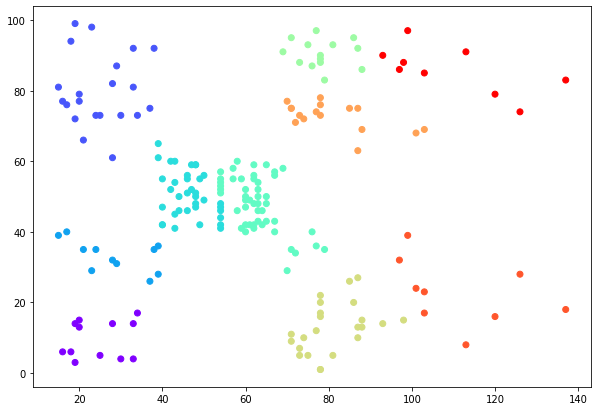

In [77]:
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=DF['My_lab'], cmap='rainbow')  
plt.show()